In [1]:
import pytreebank
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the "trees" folder
trees_folder = os.path.join(sys.path[0], 'trees')

# Load dataset from the "trees" folder
dataset = pytreebank.load_sst(trees_folder)

# Define the output path pattern
out_path_pattern = os.path.join(trees_folder, 'sst_{}.txt')

# Store train, dev and test in separate files
for category in ['train', 'test', 'dev']:
    output_path = out_path_pattern.format(category)
    with open(output_path, 'w') as outfile:
        for item in dataset[category]:
            labeled_lines = item.to_labeled_lines()
            if labeled_lines:  # Check if there are labeled lines
                label, text = labeled_lines[0]
                outfile.write("__label__{}\t{}\n".format(label + 1, text))

# Print the length of the training set
print(len(dataset['train']))


8544


In [3]:
df = pd.read_csv('trees/sst_train.txt', sep='\t', header=None, names=['label', 'text'])
df['label'] = df['label'].str.replace('__label__', '')
df['label'] = df['label'].astype(int).astype('category')
pd.set_option('display.max_colwidth', None)
examples_per_label = df.groupby('label').apply(lambda x: x.sample(5, random_state=1)).reset_index(drop=True)

# Display the result
examples_per_label

/var/folders/vl/_p1j067d5fb_bp4n_tsntj8m0000gn/T/ipykernel_87611/3154457510.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  examples_per_label = df.groupby('label').apply(lambda x: x.sample(5, random_state=1)).reset_index(drop=True)


,label,text
0,1,A yawn-provoking little farm melodrama .
1,1,Does n't add up to much .
2,1,Very stupid and annoying .
3,1,This ludicrous film is predictable at every turn .
4,1,Adam Sandler 's Eight Crazy Nights grows on you -- like a rash .
5,2,A cartoon ?
6,2,The fact that the ` best part ' of the movie comes from a 60-second homage to one of Demme 's good films does n't bode well for the rest of it .
7,2,"It 's a hellish , numbing experience to watch , and it does n't offer any insights that have n't been thoroughly debated in the media already , back in the Dahmer heyday of the mid - '90s ."
8,2,Yet another entry in the sentimental oh-those-wacky-Brits genre that was ushered in by The Full Monty and is still straining to produce another smash hit .
9,2,Ear-splitting exercise in formula crash-and-bash action .


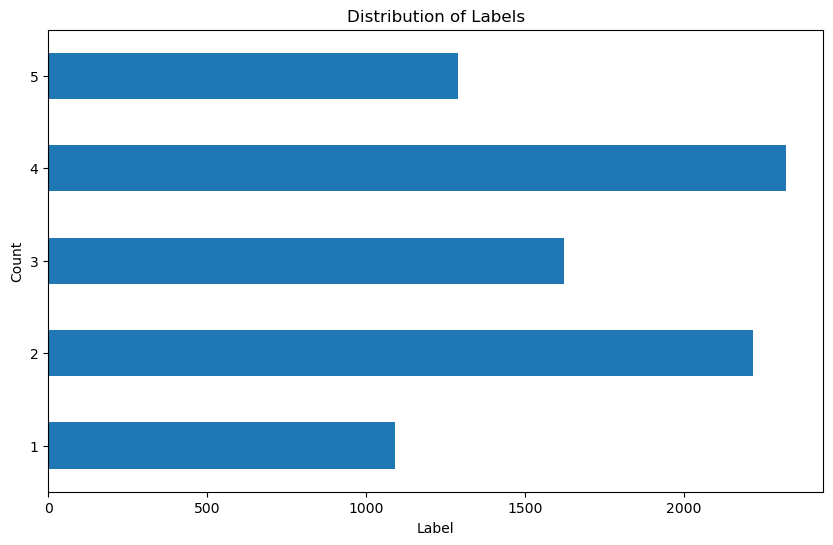

In [16]:
# Plot the distribution of labels
label_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='barh')
plt.title('Distribution of Labels Train Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

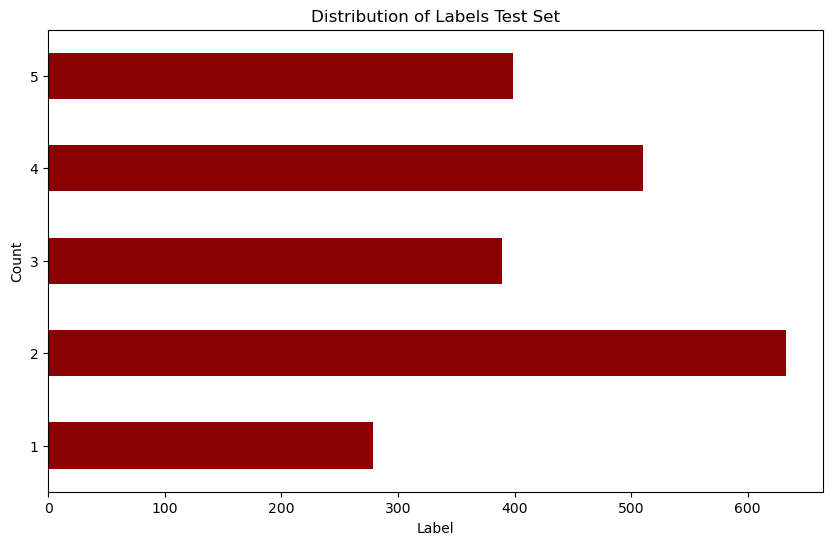

In [20]:
df = pd.read_csv('trees/sst_test.txt', sep='\t', header=None, names=['label', 'text'])
df['label'] = df['label'].str.replace('__label__', '')
df['label'] = df['label'].astype(int).astype('category')
pd.set_option('display.max_colwidth', None)
df.head()
# Plot the distribution of labels
label_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='barh',color="#8B0000")
plt.title('Distribution of Labels Test Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()